# Problem: 

The dataset is on energy consumption of the industry in the Korea Electric Power Corporation, and the perspectives on daily, monthly, and annual data are calculated and shown. Our goal is predict the uasge of current based on the other variables using regression algorithm. 

The dataset is downloaded from UCI Machine Learning Repository.


UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset

## Data Overview:

#### Steel_industry_data.csv


- date: Data Variables Type Measurement.
- Usage_kWh: Industry Energy Consumption Continuous kWh.
- Lagging_Current_Reactive.Power_kVarh: Lagging Current reactive power Continuous kVarh.
- Leading_Current_Reactive_Power_kVarh: Leading Current reactive power Continuous kVarh.
- CO2(tCO2): tCO2(CO2) Continuous ppm.
- Lagging_Current_Power_Factor: Lagging Current power factor Continuous %.
- Leading_Current_Power_Factor: Leading Current Power factor Continuous %.
- NSM: Number of Seconds from midnight Continuous.
- WeekStatus: Week status Categorical.
- Day_of_week: Day of week Categorical Sunday, Monday till Saturday.
- Load_Type: Load Type Categorical Light Load, Medium Load, Maximum Load.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [32]:
import warnings
warnings.simplefilter("ignore")

In [33]:
df= pd.read_csv('Steel_industry_data.csv')

In [34]:
df.head(10)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load
8,01/01/2018 02:15,3.28,3.64,0.0,0.0,66.94,100.0,8100,Weekday,Monday,Light_Load
9,01/01/2018 02:30,3.78,4.72,0.0,0.0,62.51,100.0,9000,Weekday,Monday,Light_Load


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

#### Observations:
- number of string/Object data type: 4
- number of float data type: 6
- number of int64 data type: 1

In [36]:
#check null values sum in each column
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [37]:
#correaltion of each variable
df.corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive.Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2(tCO2),0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


In [38]:
#descriptive statistics of dataset
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


## Exploratory Data Analysis

In [39]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [40]:
#analysis of Usage_kWh by date
most_energy_consumption= pd.pivot_table(df, index= 'date', values= 'Usage_kWh', aggfunc= {'Usage_kWh': np.max})
most_energy_consumption

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
...,...
31/12/2018 22:45,3.82
31/12/2018 23:00,3.85
31/12/2018 23:15,3.74


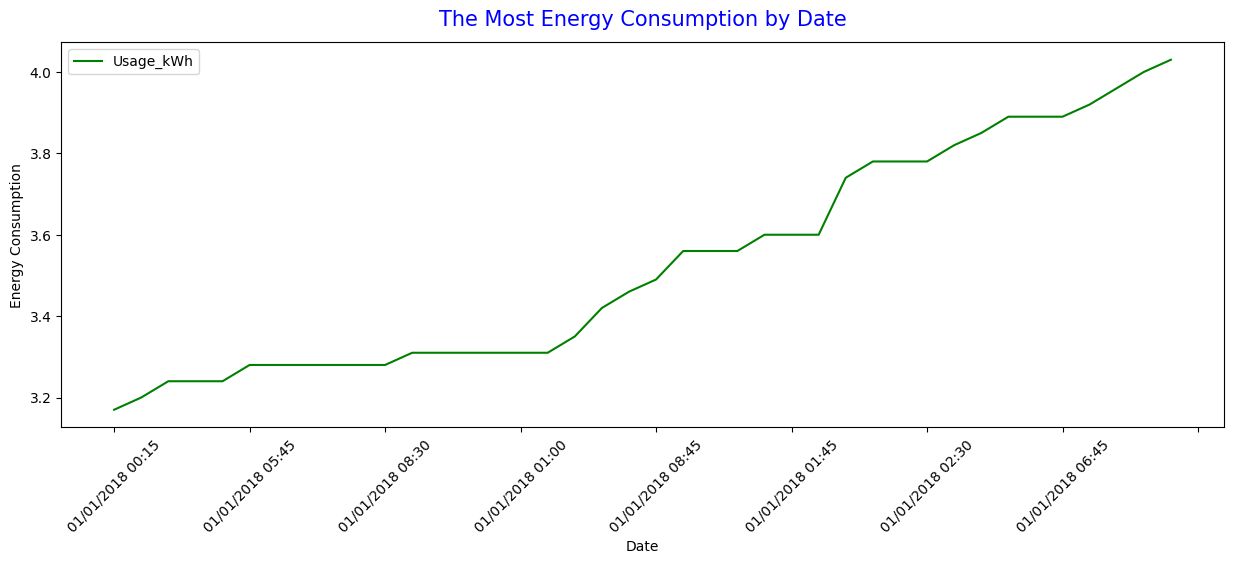

In [41]:
#visualization of the Energy consumption by Date
chart = most_energy_consumption[:40].sort_values(by = 'Usage_kWh').plot(kind = 'line', color = 'green')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)        #rotation of the labels on x-axis to 45 degree
plt.title('The Most Energy Consumption by Date', fontsize = 15, color = 'b', loc = 'center', pad = 12)
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.show()

In [42]:
#analysis of the Usage_kWh and NSM based on Load_Type, Day_of_week and WeekStatus
pd.pivot_table(df, index= ['Load_Type', 'Day_of_week', 'WeekStatus'], values= ['Usage_kWh', 'NSM'], aggfunc= {'NSM': np.mean, 'Usage_kWh': np.mean})

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

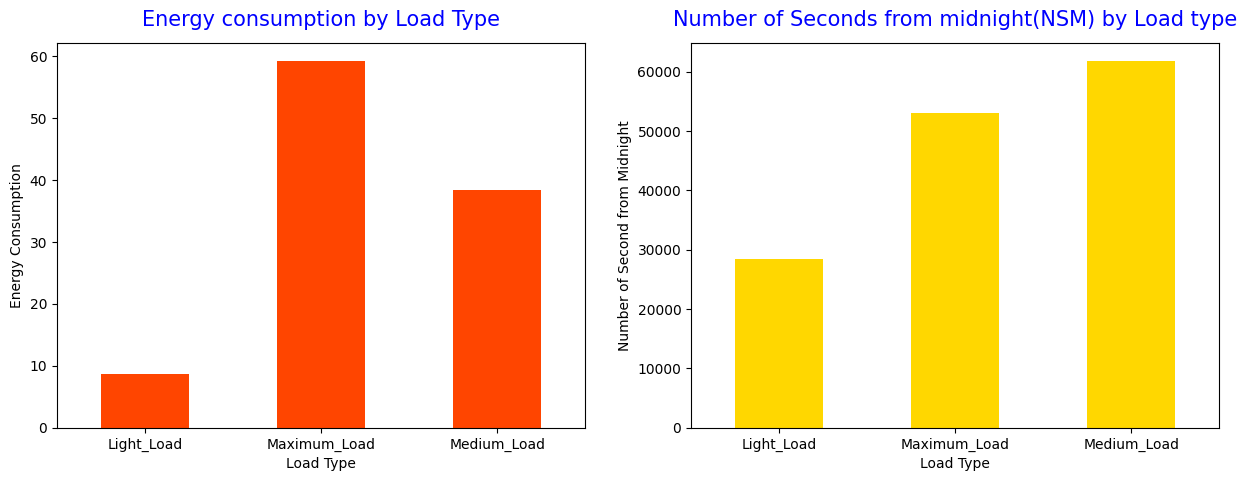

In [43]:
#visualization of Energy consumption by Load Type
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(1, 2, 1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().plot(kind = 'bar', color = 'orangered')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)        #rotation of the labels on x-axis to 0 degree
plt.title('Energy consumption by Load Type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Energy Consumption')

#visualization of Number of Seconds from midnight(NSM) by Load type
plt.subplot(1, 2, 2)
chart = df.groupby('Load_Type')['NSM'].mean().plot(kind = 'bar', color = 'gold')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)        #rotation of the labels on x-axis to 0 degree
plt.title('Number of Seconds from midnight(NSM) by Load type', fontsize = 15, color = 'b', pad = 12)
plt.xlabel('Load Type')
plt.ylabel('Number of Second from Midnight')
plt.show()

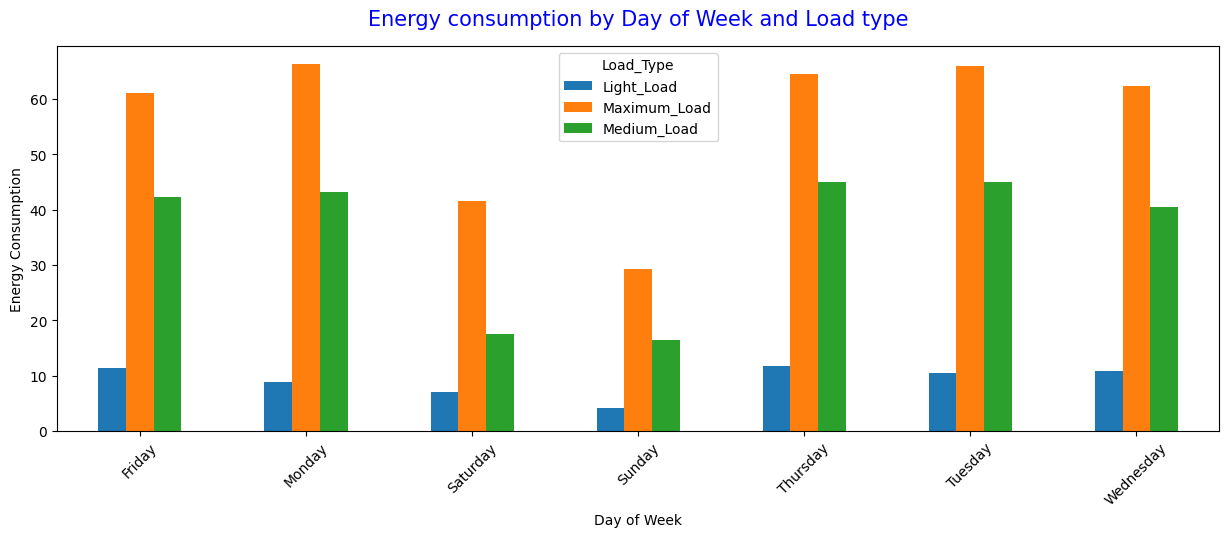

In [44]:
#visualization of Energy consumption by Day of Week and Load type
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind = 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)        #rotation of the labels on x-axis to 45 degree 
plt.title('Energy consumption by Day of Week and Load type', fontsize = 15, pad = 15, color = 'b')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption')
plt.show()

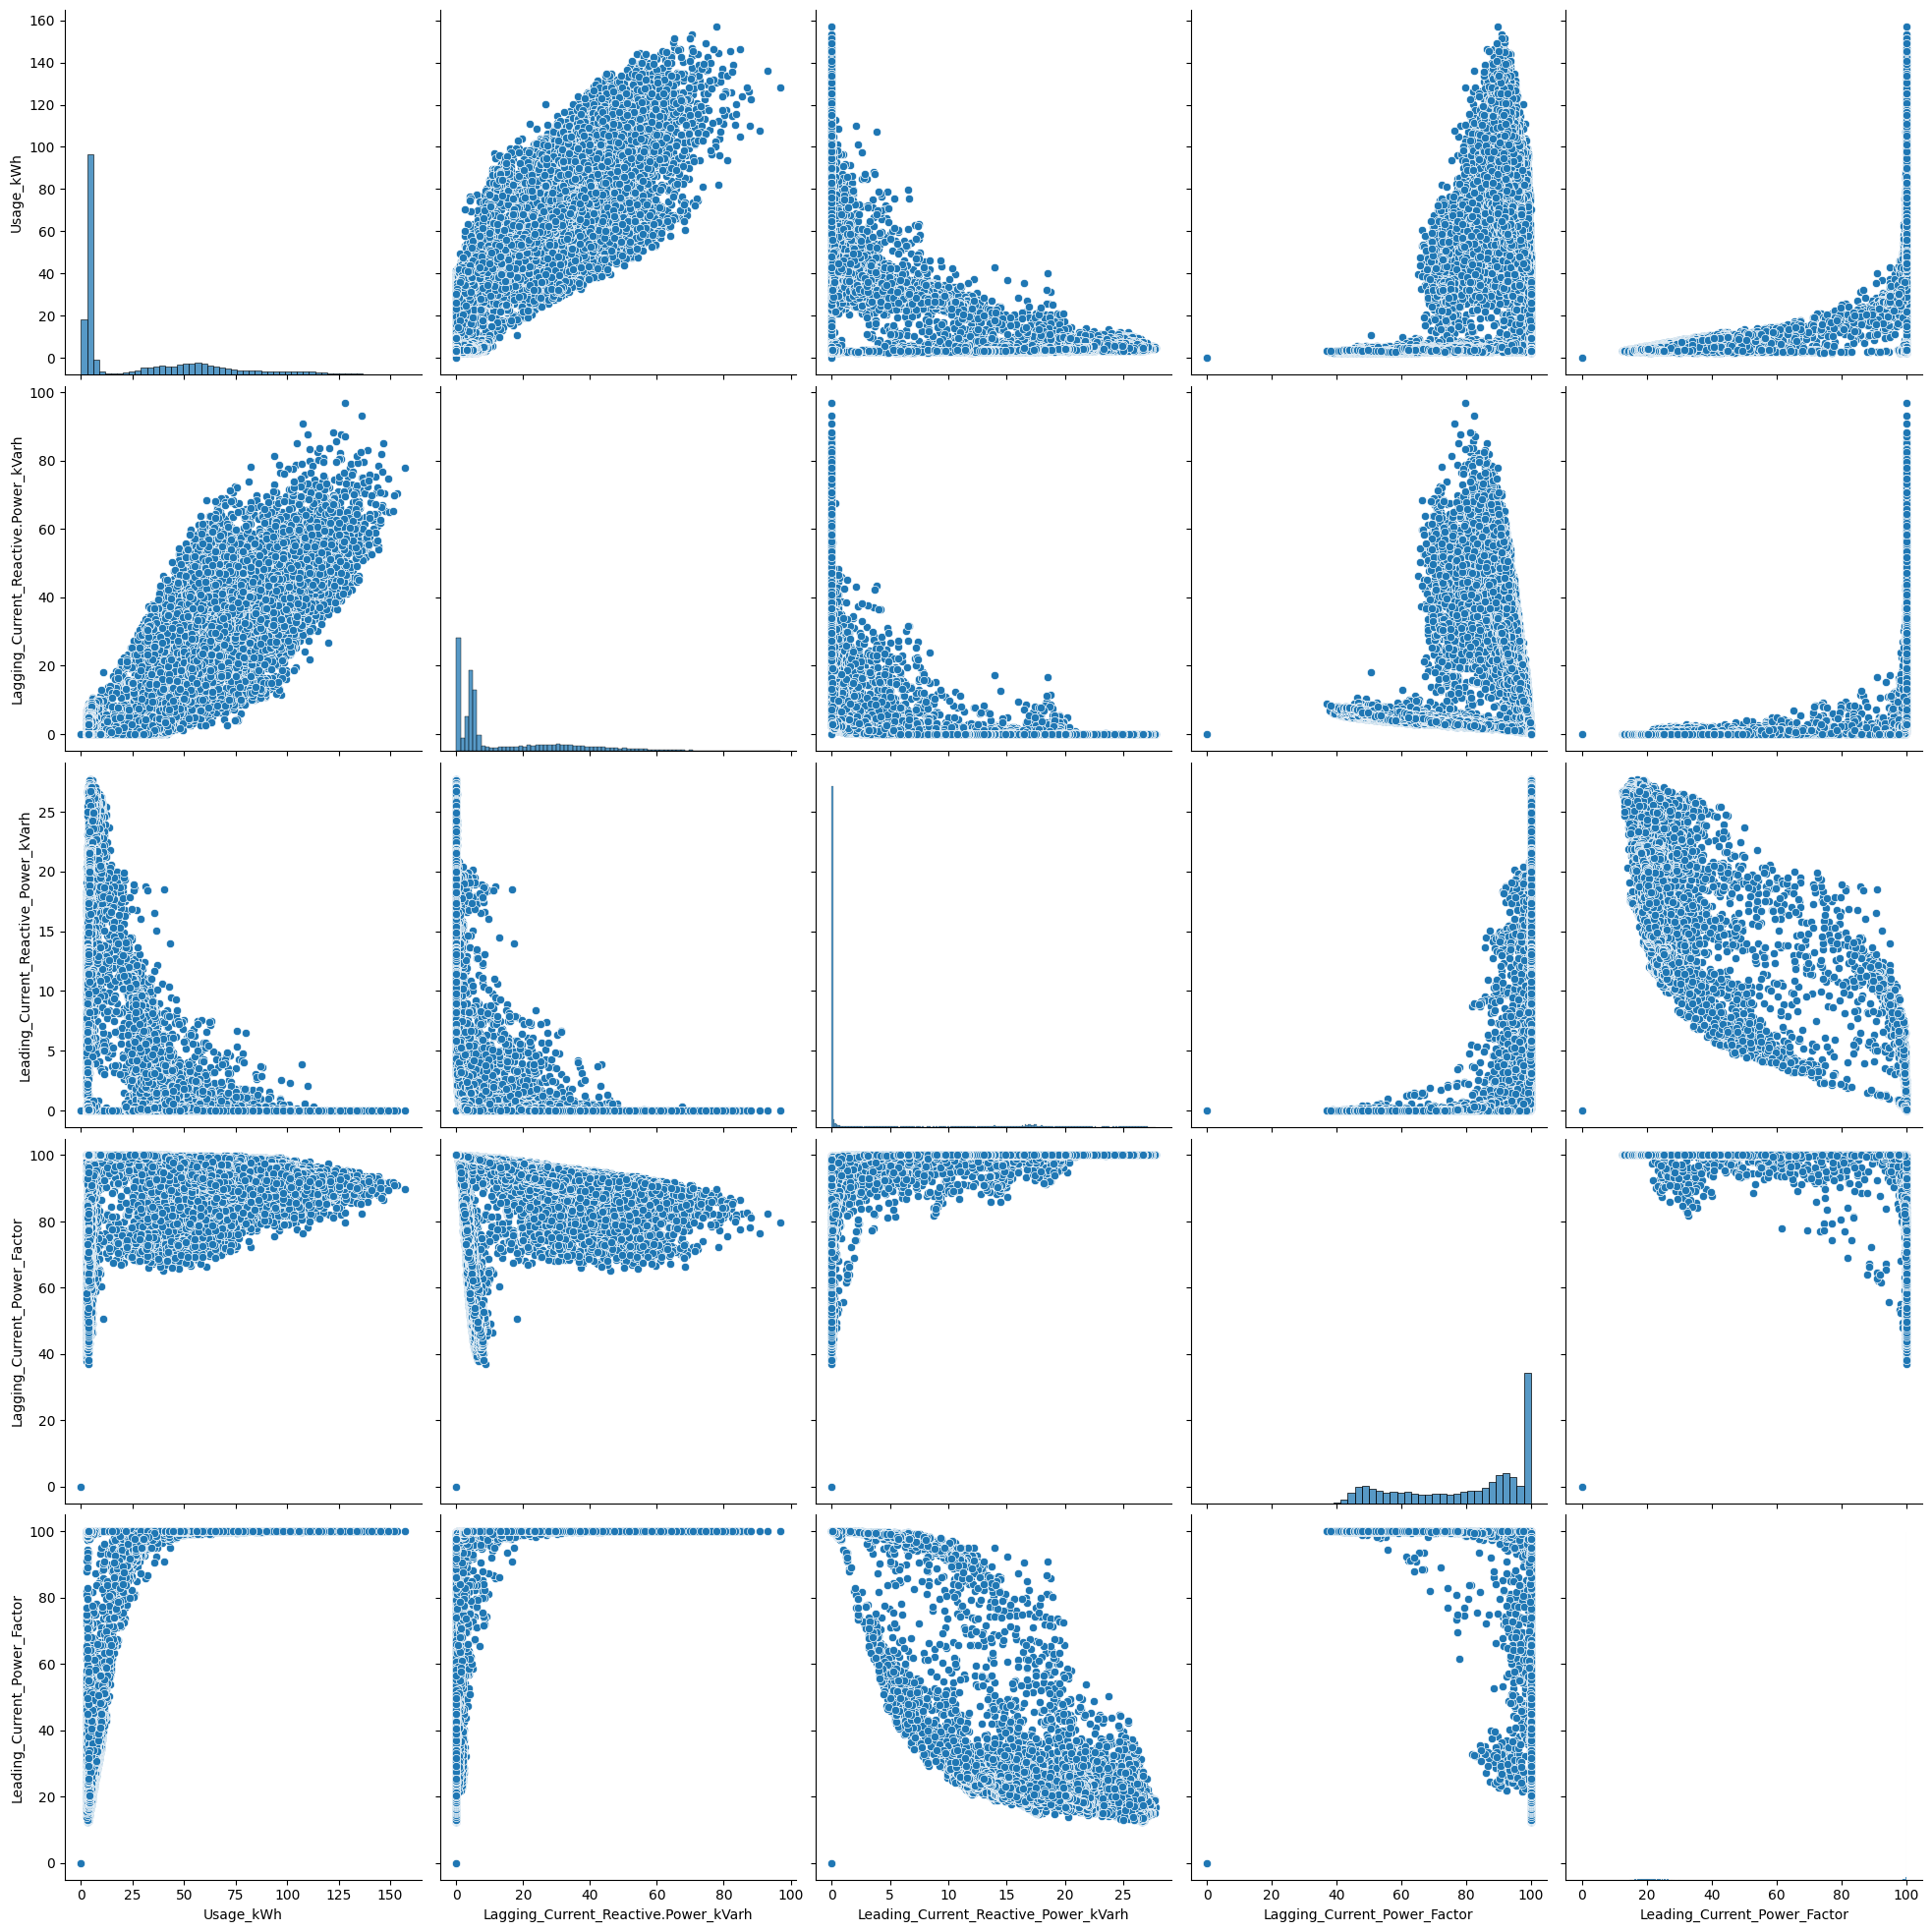

In [45]:
#distribution of selected variables by using seaborn
sns.pairplot(data=df, height= 4, vars=['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor'])
plt.show()

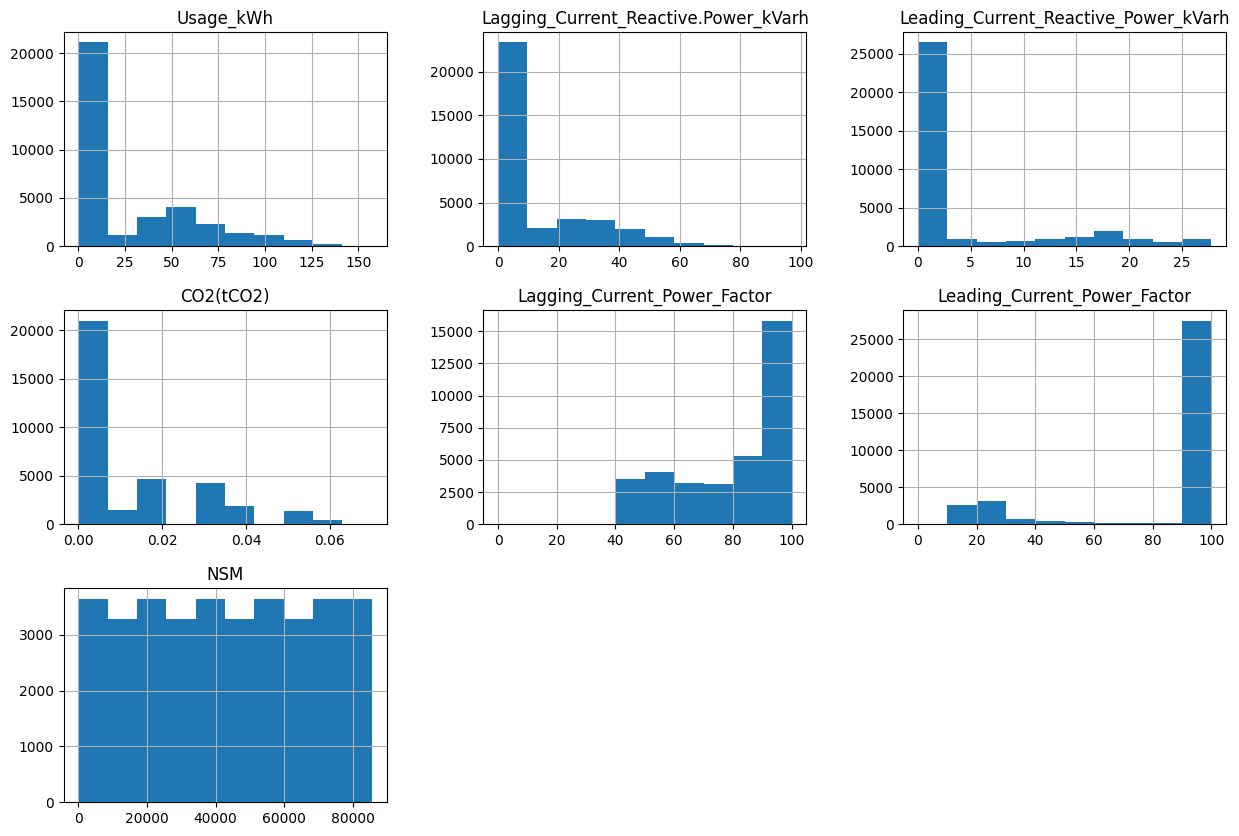

In [46]:
#distribution of each variable
df.hist(figsize = (15,10))
plt.show()

## Building of the Model using Linear Regression

In [47]:
#removing the categorical data
#grouping of the dependent variables
x= df.drop(['Usage_kWh', 'Day_of_week', 'Load_Type', 'WeekStatus', 'NSM', 'date'], axis=1)
x

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor
0,2.95,0.00,0.0,73.21,100.00
1,4.46,0.00,0.0,66.77,100.00
2,3.28,0.00,0.0,70.28,100.00
3,3.56,0.00,0.0,68.09,100.00
4,4.50,0.00,0.0,64.72,100.00
...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00
35036,3.74,0.00,0.0,70.71,100.00
35037,3.17,0.07,0.0,76.62,99.98
35038,3.06,0.11,0.0,77.72,99.96


In [48]:
#independent variable
y= df['Usage_kWh']
y

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Usage_kWh, Length: 35040, dtype: float64

In [49]:
print(x.shape)
print(y.shape)

(35040, 5)
(35040,)


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(24528, 5)
(24528,)
(10512, 5)
(10512,)


In [52]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [53]:
y_pred= lm.predict(x_test)

In [54]:
print(y_pred)

[ 1.95117158  3.81392178  2.0566924  ... 67.22685329  1.80328668
  4.79751765]


In [55]:
#1st row of the dataset
lm.predict([[2.95, 0.00, 0.0, 73.21, 100.00]])

array([4.49590769])

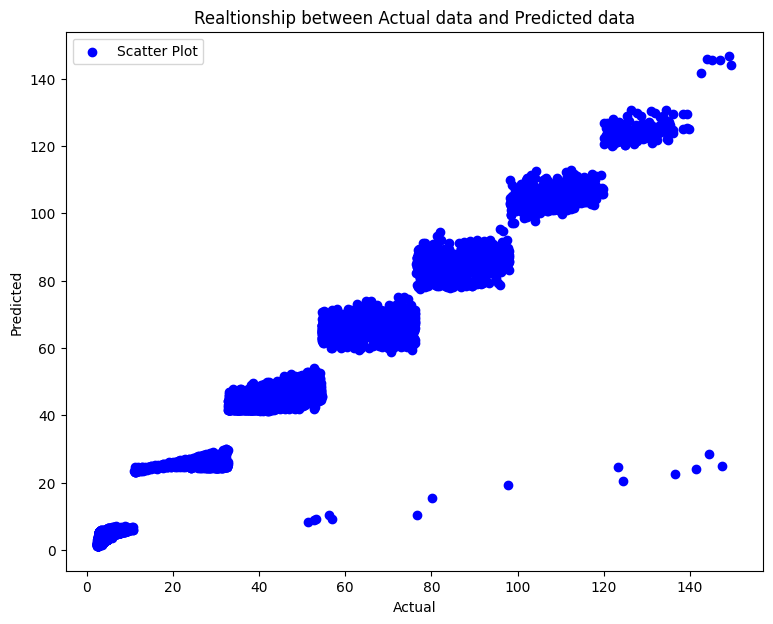

In [56]:
#visualization of Actual data and Predicted data
plt.figure(figsize=(9,7))
plt.scatter(y_test,y_pred, color='blue', label='Scatter Plot')
plt.title('Realtionship between Actual data and Predicted data', fontsize = 12)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [57]:
#computing the model slpoe
a= lm.coef_
b= lm.intercept_
print("Estimated model slope, a:", a)
print("Estimated model intercept, b:", b)

Estimated model slope, a: [2.91926041e-01 1.40517605e-01 1.70267094e+03 1.25450406e-01
 7.22912405e-02]
Estimated model intercept, b: -12.77862240893566


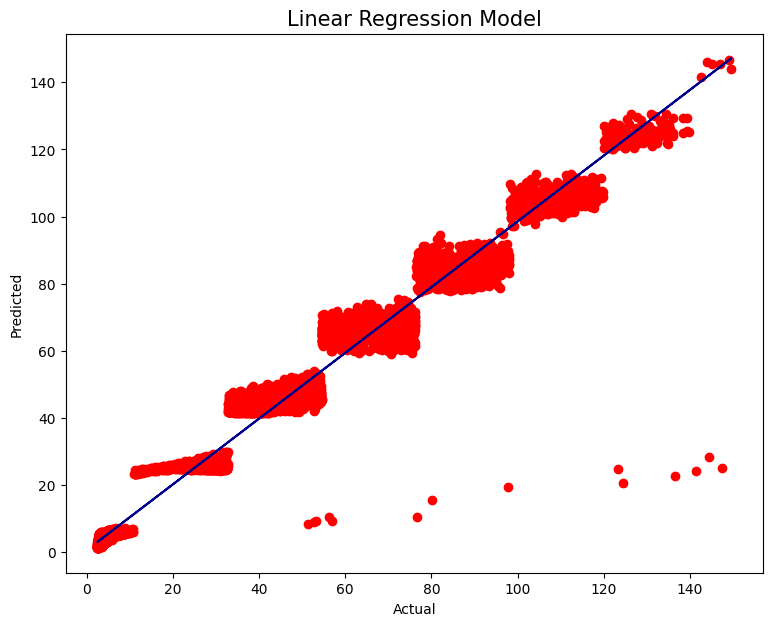

In [58]:
#visualization of the model
X = y_test
Y = y_pred

plt.figure(figsize=(9,7))
plt.title('Linear Regression Model', fontsize = 15)
plt.plot(X, Y, 'o', color = 'r')

M, B = np.polyfit(X, Y, 1)
plt.plot(X, M * X + B, color = 'darkblue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Peformance of the Model

In [59]:
#regression metrics for model performance
from sklearn.metrics import r2_score
print("R2 Score value:", (r2_score(y_test, y_pred)))

R2 Score value: 0.9778341080571645
